## 지도학습

**k최근접 이웃 실습 KNN(K Nearest Neighbor)**

In [2]:
import pandas as pd

df = pd.read_csv("./data/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [10]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = df[features]
y = df['class']

In [13]:
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# Data Standardization => N(0,1) 정규분포
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [15]:
# Train 학습
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=2) # 근접하는 데이터 2개까지 보겠다는 뜻 = 2 NearestNeighbors
clf_knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=2)

In [16]:
# Predict 예측
knn_pred = clf_knn.predict(X_test_std)
print(knn_pred)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


## 평가지표 !! DO NOT FORGET
> 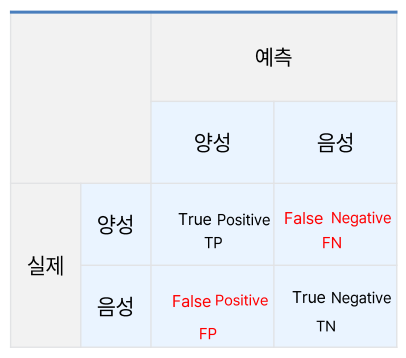
> 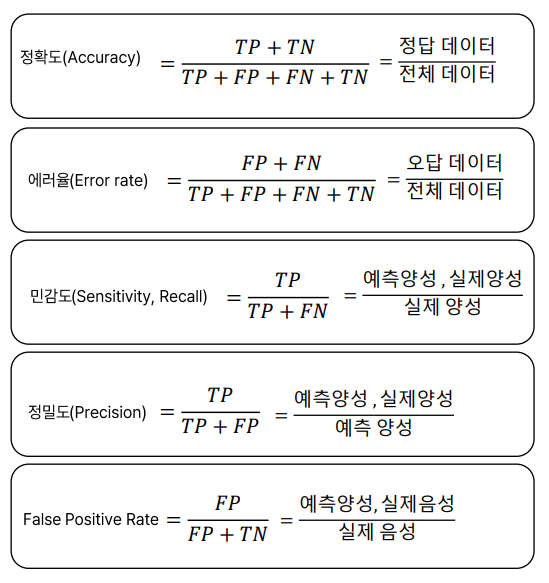

In [17]:
# Accuracy 정확도
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, knn_pred)
print(accuracy)

0.9473684210526315


In [22]:
# Precision 정밀도 => 아닌데 생사람 잡는 경우 
from sklearn.metrics import precision_score

precision = precision_score(y_test, knn_pred, average="macro")  # 평균
print(precision)

precision = precision_score(y_test, knn_pred, average="micro")  # 가중평균 -> 개수로 가중치 결정함 ! 
print(precision)

precision = precision_score(y_test, knn_pred, average="weighted") 
print(precision)

0.9421296296296297
0.9473684210526315
0.9473684210526315


In [24]:
# Recall 민감도 => 맞는데 놓치는 경우 
from sklearn.metrics import recall_score

recall = recall_score(y_test, knn_pred, average='macro')
recall

0.9421296296296297

In [25]:
# F1 score => 2 * ((precision*recall) / (precision+recall))
from sklearn.metrics import f1_score

f1 = f1_score(y_test, knn_pred, average='macro')
print(f1)

0.9421296296296297


In [26]:
# confusion matrix => tn, fp, fn, tp 개수, 차원수=변수의 개수
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, knn_pred)
conf_matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  1,  8]], dtype=int64)

In [27]:
# Classification Report => 위 평가지표 한번에 확인 
from sklearn.metrics import classification_report

class_report = classification_report(y_test, knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



**선형 회귀 분석 Linear Regression**

In [28]:
df = pd.read_csv("./data/boston_house_prices.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [31]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

X = df[features]
y = df['MEDV']  # target variable = Median value of owner-occupied homes in $1000's.

In [36]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) # 무작위로 섞이는 것 방지

In [37]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
37    0.08014   0.0   5.96     0  0.499  5.850   41.5  3.9342    5  279   
202   0.02177  82.5   2.03     0  0.415  7.610   15.7  6.2700    2  348   
368   4.89822   0.0  18.10     0  0.631  4.970  100.0  1.3325   24  666   
31    1.35472   0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307   
401  14.23620   0.0  18.10     0  0.693  6.343  100.0  1.5741   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
289   0.04297  52.5   5.32     0  0.405  6.565   22.9  7.3172    6  293   
109   0.26363   0.0   8.56     0  0.520  6.229   91.2  2.5451    5  384   
395   8.71675   0.0  18.10     0  0.693  6.471   98.8  1.7257   24  666   
480   5.82401   0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
176   0.07022   0.0   4.05     0  0.510  6.020   47.2  3.5549    5  296   

     PTRATIO       B  LSTAT  
37      19.2  396.90   8.77  
202     14.7  395.38   3.11  
368     2

In [41]:
# Data Standardization
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()  # 0~1 사이로 표준화
std_scale.fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [43]:
# Linear Regression 학습
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
reg_lr.fit(X_train_std, y_train)

LinearRegression()

참고 링크: [데이터 사이언스 스쿨](https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html?highlight=intercept)

- coef_ : 추정된 가중치 벡터
- intercept_ : 추정된 상수항

In [45]:
# 선형 회귀분석 모형 추정 계수
print(reg_lr.coef_)  # Estimated coefficients for the linear regression problem. => 기울기
print(reg_lr.intercept_)  # Independent term in the linear model. => 절편

[-0.92508886  1.01371287  0.21890094  0.15452572 -2.37582283  2.74133679
  0.33439531 -3.17973252  2.53542112 -2.19196249 -2.26845893  0.65817308
 -3.56707882]
22.6891820580475


In [48]:
# Ridge 회귀분석 (L2 Regularization, 제약식)
from sklearn.linear_model import Ridge

clf_ridge = Ridge(alpha=1)
clf_ridge.fit(X_train_std, y_train)

Ridge(alpha=1)

In [51]:
# Lasso 회귀분석 (L1 Regularization)
from sklearn.linear_model import Lasso
clf_lasso = Lasso(alpha=0.01)
clf_lasso.fit(X_train_std, y_train)

Lasso(alpha=0.01)

In [52]:
# ElasticNet
from sklearn.linear_model import ElasticNet
clf_elastic = ElasticNet(alpha=0.01,l1_ratio=0.01)
clf_elastic.fit(X_train_std, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [53]:
# Prediction
pred_lr = reg_lr.predict(X_test_std)
pred_ridge = clf_ridge.predict(X_test_std)
pred_lasso = clf_lasso.predict(X_test_std)
pred_elastic = clf_elastic.predict(X_test_std)

In [54]:
# Evaluate - 모형 평가 R제곱값
from sklearn.metrics import r2_score

print(r2_score(y_test, pred_lr))
print(r2_score(y_test, pred_ridge))
print(r2_score(y_test, pred_lasso))
print(r2_score(y_test, pred_elastic))

0.7068468901433742
0.7070348879473798
0.7068158241340241
0.7073045928973538


In [55]:
# Mean Squared Error 모형 평가 
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, pred_lr))
print(mean_squared_error(y_test, pred_ridge))
print(mean_squared_error(y_test, pred_lasso))
print(mean_squared_error(y_test, pred_elastic))

26.522333763452465
26.50532510709855
26.52514438711968
26.480924190102087


**로지스틱 회귀분석 Logistic Regression**
- 데이터가 어떤 범주에 속할 확률: 0~1 사이 값으로 예측
- log odds(사건이 발생할 확률/사건이 발생하지 않을 확률) -> sigmoid 함수 사용해서 Z 변형
- 이항분포를 따른다 -> 0 or 1

In [56]:
df = pd.read_csv("./data/wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [57]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'class'],
      dtype='object')

In [58]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline']

X = df[features]
y = df['class']

In [59]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [60]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)  # 데이터 스케일링

In [62]:
# Logistic Regression (L2 제약식 적용)
from sklearn.linear_model import LogisticRegression

clf_logi_l2 = LogisticRegression(penalty='l2')
clf_logi_l2.fit(X_train_std, y_train)

LogisticRegression()

In [63]:
# Logistic 회귀분석 모형 추정 계수
print(clf_logi_l2.coef_)
print(clf_logi_l2.intercept_)

[[ 0.69853977  0.25867826  0.39868195 -0.76815236 -0.00429211  0.18526119
   0.74915884 -0.12654939  0.10401364  0.17318889  0.13724279  0.68065574
   0.98907933]
 [-0.81533159 -0.47295284 -0.74058812  0.54948684 -0.08525548  0.01376966
   0.18741135  0.13017416  0.324744   -1.07084932  0.57591149  0.1276171
  -0.99183488]
 [ 0.11679181  0.21427458  0.34190617  0.21866552  0.08954759 -0.19903085
  -0.93657019 -0.00362477 -0.42875763  0.89766042 -0.71315428 -0.80827284
   0.00275554]]
[ 0.29606777  0.57687138 -0.87293914]


In [64]:
# Prediction
pred_logistic = clf_logi_l2.predict(X_test_std)
print(pred_logistic)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [65]:
# 확률값으로 예측
pred_proba = clf_logi_l2.predict_proba(X_test_std)
print(pred_proba)

[[9.93360060e-01 4.92359807e-03 1.71634194e-03]
 [3.22076323e-04 2.77943948e-04 9.99399980e-01]
 [1.00535859e-02 9.89854907e-01 9.15071461e-05]
 [9.85578241e-01 1.15830075e-02 2.83875127e-03]
 [9.72825954e-02 8.94560998e-01 8.15640637e-03]
 [1.60778757e-01 8.37805552e-01 1.41569030e-03]
 [9.99185889e-01 2.82861666e-04 5.31249532e-04]
 [9.27747541e-04 6.79471537e-03 9.92277537e-01]
 [4.73077770e-03 9.94412333e-01 8.56889586e-04]
 [1.16783305e-03 9.96547896e-01 2.28427103e-03]
 [2.29360201e-02 1.70472078e-02 9.60016772e-01]
 [5.37945912e-04 2.05426668e-03 9.97407787e-01]
 [9.99868646e-01 4.18491948e-05 8.95049101e-05]
 [7.05474922e-02 9.29254258e-01 1.98249912e-04]
 [3.43785273e-03 1.00980993e-03 9.95552337e-01]
 [1.23126171e-04 9.99870752e-01 6.12188768e-06]
 [9.95131651e-01 3.26254700e-03 1.60580153e-03]
 [9.99969651e-01 5.43181185e-06 2.49174273e-05]
 [5.79978522e-03 7.64925188e-01 2.29275027e-01]
 [9.98986465e-01 9.25988748e-04 8.75463768e-05]
 [6.06195463e-02 9.39306550e-01 7.390404

In [72]:
# 정확도, 정밀도, recall, f1_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, pred_logistic)
precision = precision_score(y_test, pred_logistic, average="macro")
recall = recall_score(y_test, pred_logistic, average='macro')
f1 = f1_score(y_test, pred_logistic, average="macro")

print(accuracy)
print(precision)
print(recall)
print(f1)

1.0
1.0
1.0
1.0


In [74]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred_logistic)
conf_matrix

array([[16,  0,  0],
       [ 0, 21,  0],
       [ 0,  0,  8]], dtype=int64)

In [77]:
# Classification Report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, pred_logistic)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**나이브 베이즈 알고리즘 Naive Bayes Algorithm**
- 조건부 확률  !!!

In [78]:
df = pd.read_csv("./data/wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [80]:
# Naive Bayes 학습
from sklearn.naive_bayes import GaussianNB  # 연속형 변수 

clf_gnb = GaussianNB()
clf_gnb.fit(X_train_std, y_train)

GaussianNB()

In [81]:
# Prediction
pred_gnb = clf_gnb.predict(X_test_std)
print(pred_gnb)

[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [82]:
# 평가

accuracy = accuracy_score(y_test, pred_gnb)
precision = precision_score(y_test, pred_gnb, average="macro")
recall = recall_score(y_test, pred_gnb, average='macro')
f1 = f1_score(y_test, pred_gnb, average="macro")

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9333333333333333
0.9259259259259259
0.9523809523809524
0.9351432880844645


In [83]:
conf_matrix = confusion_matrix(y_test, pred_gnb)
print(conf_matrix)

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]


In [84]:
class_report = classification_report(y_test, pred_gnb)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



**Decision Tree 의사결정나무**
- 좋은 성능: 작은 나무일수록
- Feature가 연속형이면 => 평균값으로 추정

**스코어링 방법**
- 노드별 엔트로피 측정
> 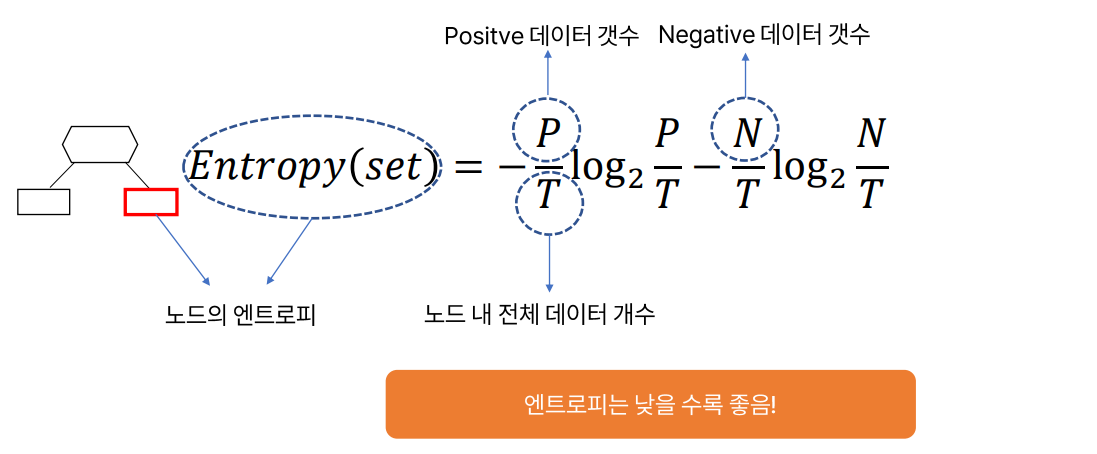
> entropy: 무질서 정도    
> 낮을 수록 좋다   
> 노드별 엔트로피 측정 후 -> 테스트 전체 퀄리티 측정 

In [85]:
# Decision Tree 학습
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train_std, y_train)

DecisionTreeClassifier(random_state=0)

In [87]:
# Prediction
pred_tree = clf_tree.predict(X_test_std)
print(pred_tree)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 1 0 1 1 1]


In [88]:
# 평가

accuracy = accuracy_score(y_test, pred_tree)
precision = precision_score(y_test, pred_tree, average="macro")
recall = recall_score(y_test, pred_tree, average='macro')
f1 = f1_score(y_test, pred_tree, average="macro")

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9333333333333333
0.9326599326599326
0.9424603174603176
0.9349141206870346


In [89]:
conf_matrix = confusion_matrix(y_test, pred_tree)
print(conf_matrix)

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [90]:
class_report = classification_report(y_test, pred_tree)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.95      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



**서포트 벡터 머신 Support Vector Machine**
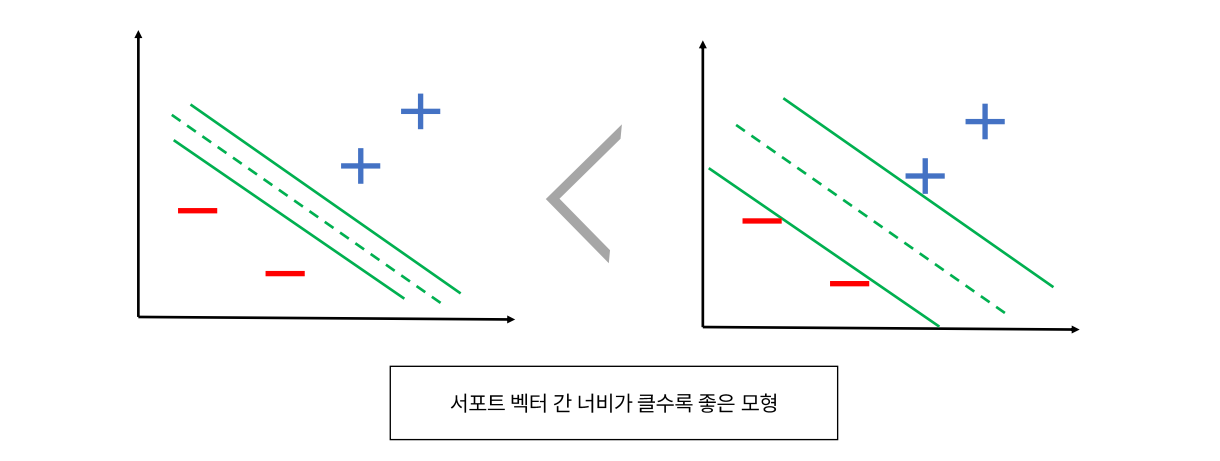
= 너비 최대화 = 벡터w 자신과의 내적값 최소화 

- 목적함수 objective function (최적화)
- 제약조건 constraint (결정조건)

    > **Lagrangian 라그랑지안** : 목적 함수 + 제약식 => 한꺼번에 사용 
    > - alpha_i : Lagrange multiplier

In [92]:
# SVM 학습
from sklearn import svm

clf_svm_lr = svm.SVC(kernel='linear', random_state=0) 
clf_svm_lr.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=0)

In [93]:
# 예측
pred_svm = clf_svm_lr.predict(X_test_std)
print(pred_svm)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [94]:
# 평가

accuracy = accuracy_score(y_test, pred_svm)
precision = precision_score(y_test, pred_svm, average="macro")
recall = recall_score(y_test, pred_svm, average='macro')
f1 = f1_score(y_test, pred_svm, average="macro")

print(accuracy)
print(precision)
print(recall)
print(f1)

1.0
1.0
1.0
1.0


In [95]:
conf_matrix = confusion_matrix(y_test, pred_svm)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [96]:
class_report = classification_report(y_test, pred_svm)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

